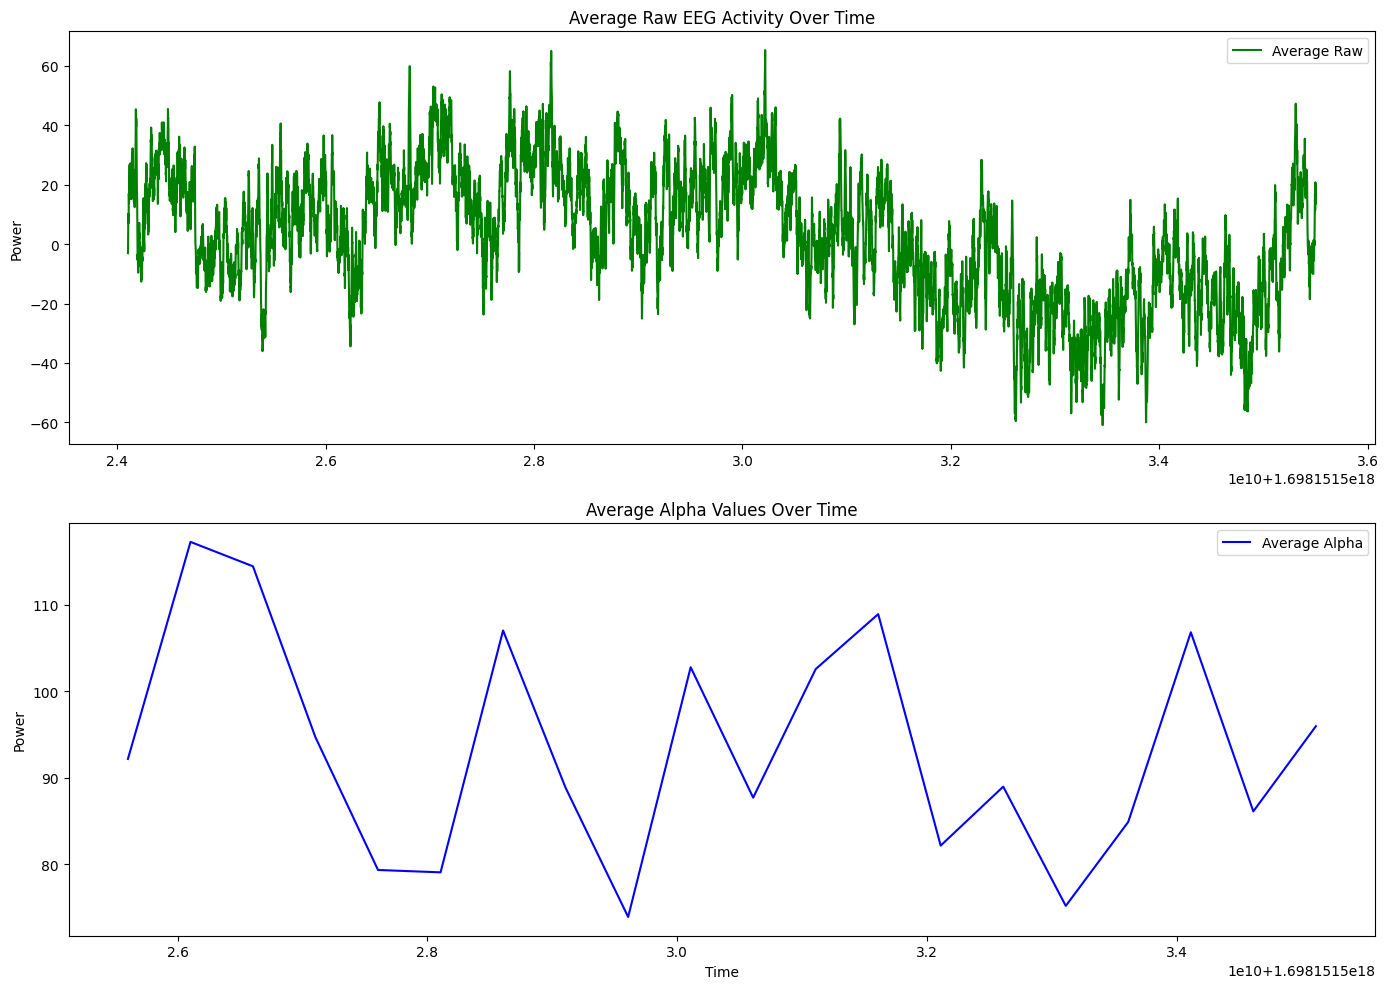

In [1]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt

# Load raw data
filename_raw = "/Users/wanne/hdf5/raw/20231024-124523.hdf5"
with h5py.File(filename_raw, 'r') as f:
    eeg_raw = f['eeg/raw/table'][:]
index_raw = eeg_raw['index']
values_raw = eeg_raw['values_block_0']
df_raw = pd.DataFrame(values_raw, index=index_raw)
df_raw['average'] = df_raw.mean(axis=1)

# Load band data (alpha values)
filename_bands = "/Users/wanne/hdf5/bands/20231024-124523.hdf5"
with h5py.File(filename_bands, 'r') as f:
    eeg_bands = f['eeg/bands/table'][:]
index_bands = eeg_bands['index']
values_bands = eeg_bands['values_block_0']
df_bands = pd.DataFrame(values_bands, index=index_bands)
df_bands['average_alpha'] = df_bands.mean(axis=1)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 10))

# Plot average raw data on the first subplot
axs[0].plot(df_raw.index, df_raw['average'], label='Average Raw', color='green')
axs[0].set_title('Average Raw EEG Activity Over Time')
axs[0].set_ylabel('Power')
axs[0].legend()

# Plot average band data (alpha values) on the second subplot
axs[1].plot(df_bands.index, df_bands['average_alpha'], label='Average Alpha', color='blue')
axs[1].set_title('Average Alpha Values Over Time')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Power')
axs[1].legend()

# Display the plots
plt.tight_layout()
plt.show()
